In [14]:
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap,align
import matplotlib.pyplot as plt
import numpy as np 
import MDAnalysis.analysis.rms
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import glob
from glob import glob
ANGSTROM = "Å"

plt.rc('font', family='serif')
plt.rc('font', family='serif', size=18)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

## Load up universe and reference structure

In [16]:
##Load up universe 
u = mda.Universe('MD_files/nvt_5ns.gro', 'MD_files/nvt_5ns.xtc')

##Load up reference structure for comparison
ref = mda.Universe('MD_files/PSII_processed_OEC_ions.gro')
print(u.trajectory)

<XTCReader MD_files/nvt_5ns.xtc with 2501 frames of 861894 atoms>


## To calculate distance between two atoms

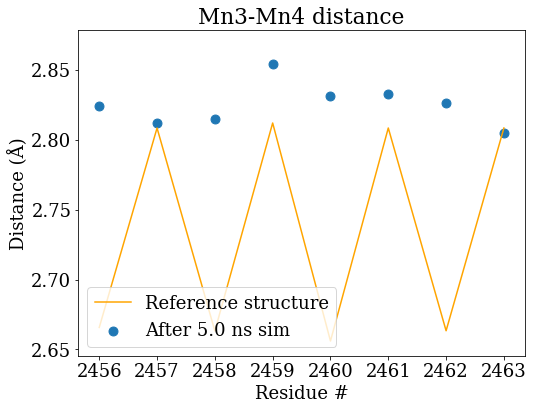

In [21]:
#Select atoms for distance calc
atom1='Mn3'
atom2='Mn4'

x= u.trajectory
time_in_ns = (len(x) *2 -2)/1000

#From your universe#
select1 = u.select_atoms("resname OEX and name %s " %atom1)
select2 = u.select_atoms("resname OEX and name %s" %atom2)

#Reference#
atomone_start =ref.select_atoms("resname OEX and name %s" %atom1)
atomtwo_start = ref.select_atoms("resname OEX and name %s" %atom2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

resids1, resids2, dist = distances.dist(select2, select1,
                                        offset=0) 
resids1_start, resids2_start, dist_start = distances.dist(atomtwo_start, atomone_start,
                                        offset=0) 

plt.scatter(resids1, dist, s=80,label = 'After %s ns sim' %time_in_ns)
plt.plot(resids1_start, dist_start, color ='orange', label = 'Reference structure')
plt.xlabel ("Residue #")
plt.legend(loc = "lower left")
plt.ylabel ("Distance (%s)" %ANGSTROM)
plt.title('%s-%s distance' %(atom1, atom2))
plt.show()

## RMSD Analysis for all 8 copies

In [18]:
res = 'OEX'
atom= 'O1'
selection = u.select_atoms("resname %s and name %s" %(res, atom))
resid = selection.resids
selection_list=[]
for z in resid:
    selection_list.append("resname %s and resid %s" %(res,z))
selection_list

['resname OEX and resid 2456',
 'resname OEX and resid 2457',
 'resname OEX and resid 2458',
 'resname OEX and resid 2459',
 'resname OEX and resid 2460',
 'resname OEX and resid 2461',
 'resname OEX and resid 2462',
 'resname OEX and resid 2463']

Text(0, 0.5, 'RMSD ($\\AA$)')

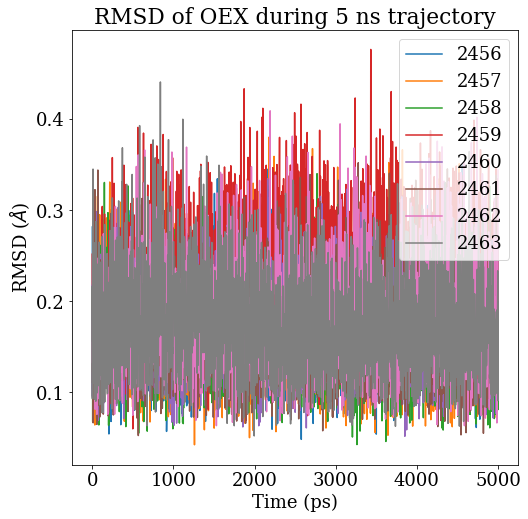

In [20]:
from matplotlib import rc
import MDAnalysis.analysis.rms
ref = mda.Universe('MD_files/nvt.gro')
R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=selection_list)                            
R.run()

rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
x= u.trajectory
time_in_ns = (len(x) *2 -2)/1000


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i in range(0,len(resid)):
    ax.plot(time, rmsd[i+3], label='%s' %resid[i])


ax.set_title('RMSD of %s during %d ns trajectory' %(res, time_in_ns ))
ax.legend(loc="upper right")
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)" )